# [Шпаргалка по визуализации данных в Python с помощью Plotly](https://habr.com/ru/post/502958/)

## Импорт


Для статического отображения графиков, необходимо установить `plotly orca`, вариант установки:

```
!pip install plotly>=4.7.1 > /dev/null
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4 > /dev/null
```

In [2]:
import numpy as np
import pandas as pd

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

## Общие настройки

`show_format = '' ` - интерактивный режим

`show_format = 'svg'` - статический режим

In [3]:
show_format = 'svg'

# Линейный график

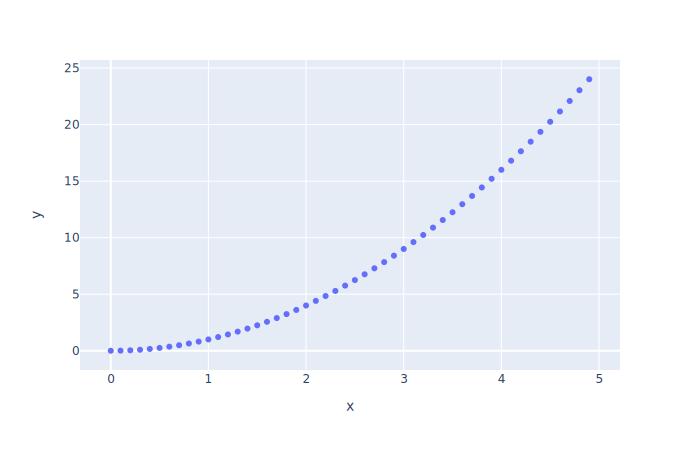

In [4]:
x = np.arange(0, 5, 0.1)

def f(x):
    return x**2

px.scatter(x=x, y=f(x)).show(show_format)   

Более читабельно и правильно записать тот же в код в следующем виде:

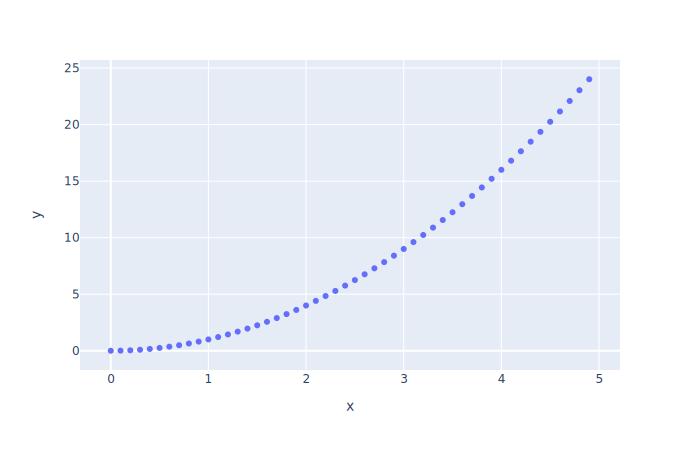

In [5]:
x = np.arange(0, 5, 0.1)

def f(x):
    return x**2

fig = px.scatter(x=x, y=f(x))    
fig.show(show_format)

В отличие от Matplotlib отдельные объекты осей не создаются.

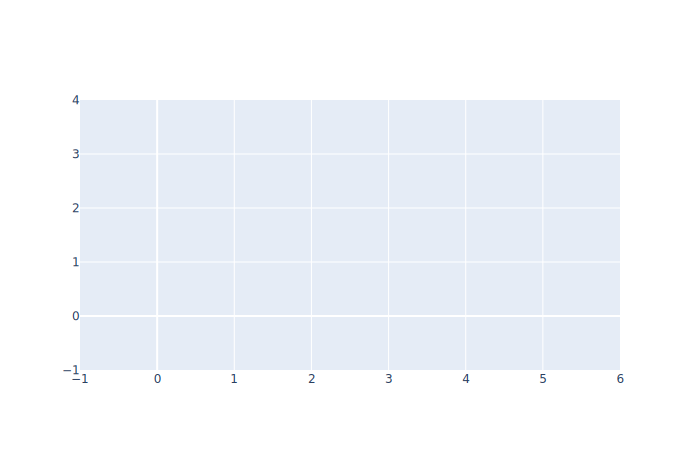

In [6]:
fig = go.Figure()
fig.show(show_format)

In [7]:
go.Scatter(x=x, y=f(x))

Scatter({
    'x': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
                1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
                2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
                4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
    'y': array([0.000e+00, 1.000e-02, 4.000e-02, 9.000e-02, 1.600e-01, 2.500e-01,
                3.600e-01, 4.900e-01, 6.400e-01, 8.100e-01, 1.000e+00, 1.210e+00,
                1.440e+00, 1.690e+00, 1.960e+00, 2.250e+00, 2.560e+00, 2.890e+00,
                3.240e+00, 3.610e+00, 4.000e+00, 4.410e+00, 4.840e+00, 5.290e+00,
                5.760e+00, 6.250e+00, 6.760e+00, 7.290e+00, 7.840e+00, 8.410e+00,
                9.000e+00, 9.610e+00, 1.024e+01, 1.089e+01, 1.156e+01, 1.225e+01,
                1.296e+01, 1.369e+01, 1.444e+01, 1.521e+01, 1.600e+01, 1.681e+01,
                1.764e+01, 1.849e+01, 1.936e+01, 2.025e+01, 2.116e+01, 2.209e+01,
                2.

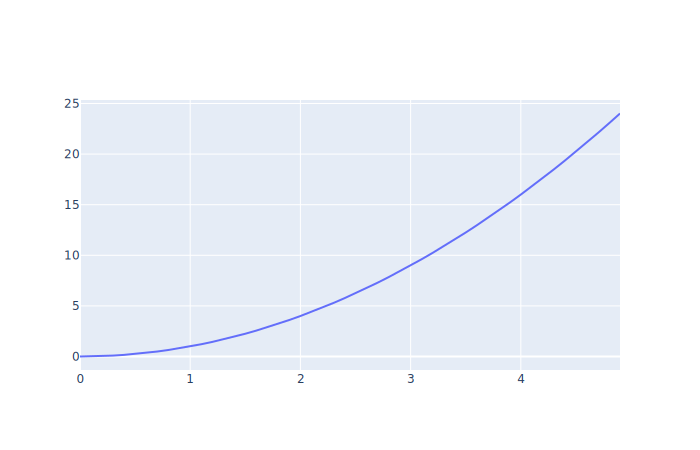

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.show(show_format)

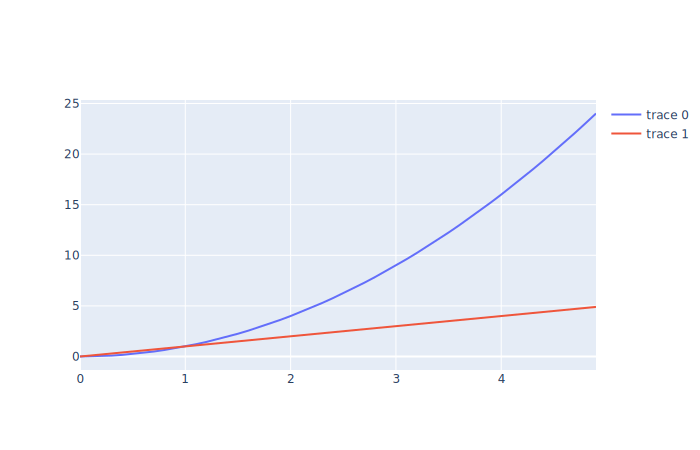

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.add_trace(go.Scatter(x=x, y=x))
fig.show(show_format)

## Подписи графиков

К сожалению, это имеет свои ограничения, как можно заметить подсказка при наведении на график отображается в «сыром» виде, а не в LATEX.

Победить это можно, если использовать HTML разметку в подписях. В данном примере я буду использовать тег sup. Так же заметьте, что шрифт для LATEX и HTML отличается начертанием.

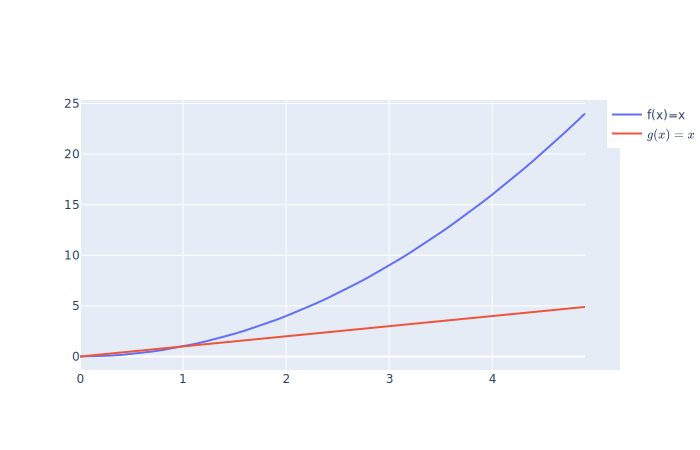

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.show(show_format)

Чтобы легенда не наезжала на график

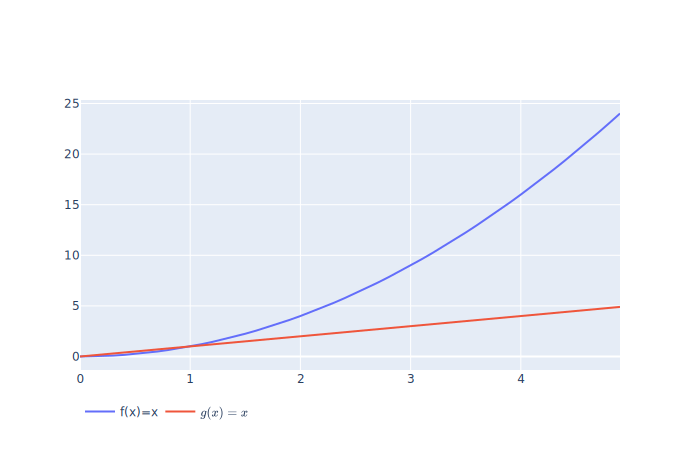

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h")
fig.show(show_format)

Зададим везде нулевые отступы fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))

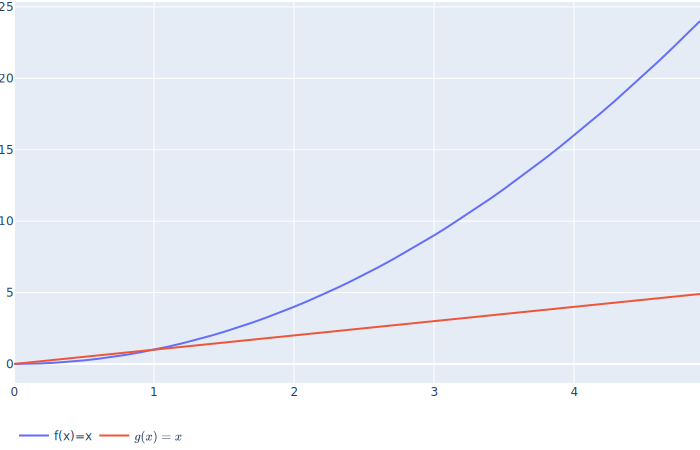

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show(show_format)

Центрирование `legend=dict(x=.5, xanchor="center")`

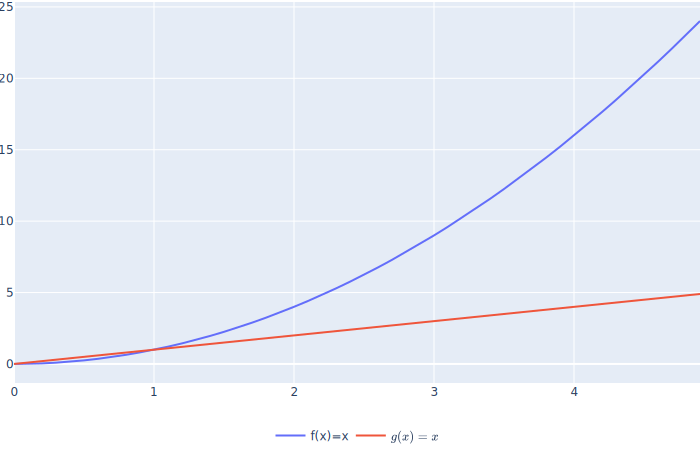

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show(show_format)

Выделим точки

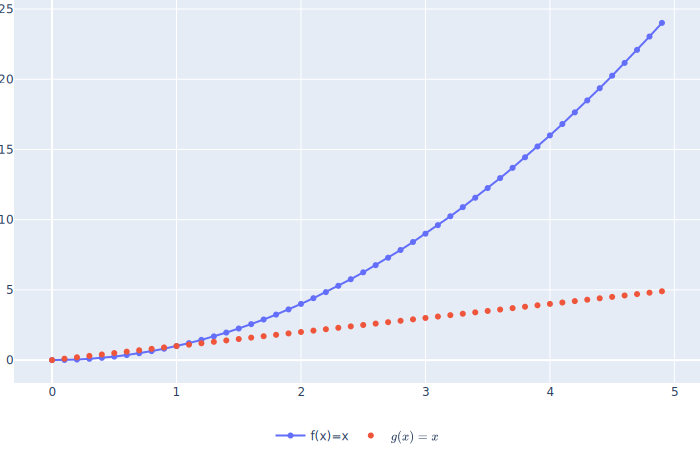

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>',
                         mode='lines+markers'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$',
                         mode='markers'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show(show_format)

Вывод информации только о коорданатах точек, без названия графика

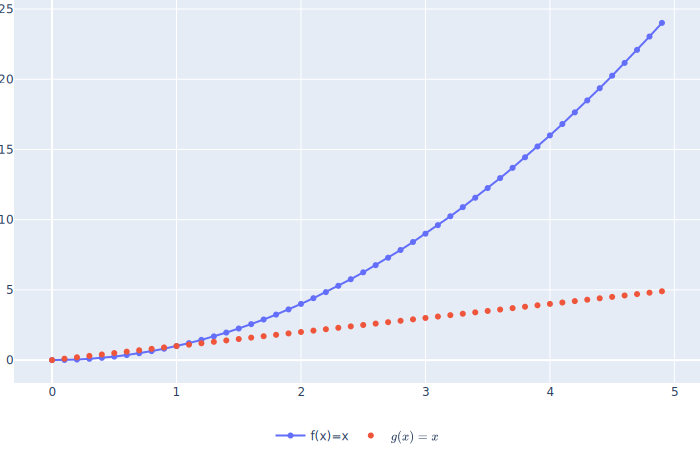

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>',
              mode='lines+markers'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$', mode='markers'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=0.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo='x+y')
fig.show(show_format)

Расширение шаблона подсказки.

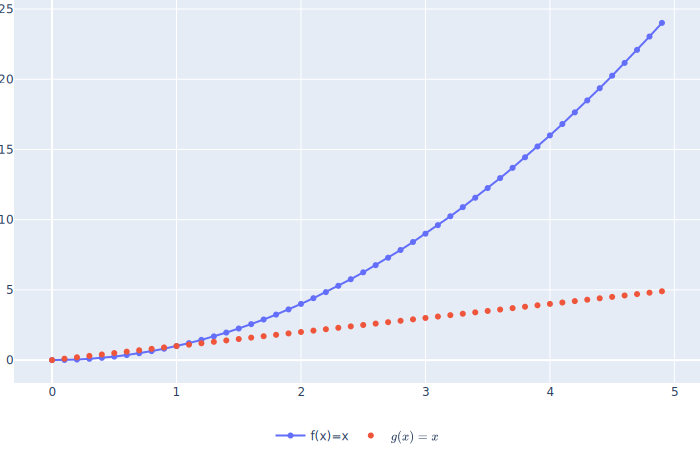

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>',
                         mode='lines+markers'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$', mode='markers'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=0.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", 
                  hovertemplate="Аргумет: %{x}<br>Функция: %{y}")
fig.show(show_format)

Изменение формата маркеров

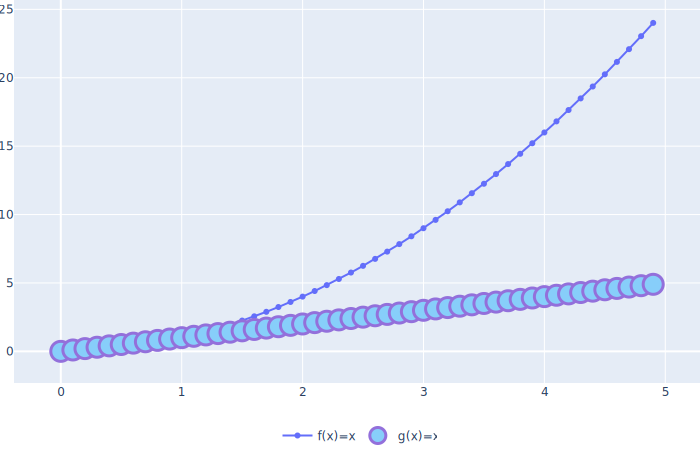

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>',
                         mode='lines+markers'))
fig.add_trace(go.Scatter(x=x, y=x, name='g(x)=x', mode='markers',
                         marker=dict(color='LightSkyBlue', size=20, 
                                     line=dict(color='MediumPurple',
                                               width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=0.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", 
                  hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show(show_format)

Определение границ области демонстрации графика

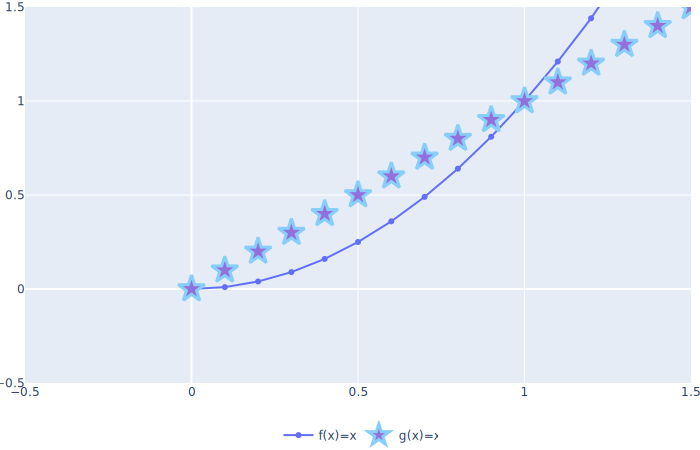

In [18]:
fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5])
fig.update_xaxes(range=[-0.5, 1.5])
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>',
                         mode='lines+markers'))
fig.add_trace(go.Scatter(x=x, y=x, name='g(x)=x', 
                         mode='markers',
                         marker_symbol='star',
                         marker=dict(color='MediumPurple',
                                     size=20,
                                     line=dict(color='LightSkyBlue',
                                               width=3))))
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0.5, xanchor='center'),
                  hovermode='x',
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo='all', 
                  hovertemplate='Аргумент: %{x}<br>Функция: %{y}')
fig.show(show_format)

Добавление осевых линий

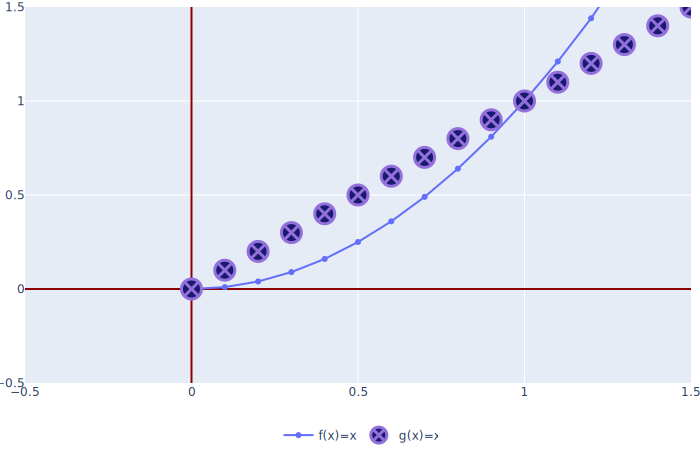

In [19]:
fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, 
                 zerolinecolor='DarkRed')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2,
                 zerolinecolor='DarkRed')
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>',
                         mode='lines+markers'))
fig.add_trace(go.Scatter(x=x, y=x, name='g(x)=x', mode='markers',
                         marker_symbol='circle-x',
                         marker=dict(color='MidNightBlue', size=20,
                                     line=dict(color='MediumPurple',
                                               width=3))))
fig.update_layout(legend_orientation='h', hovermode='x',
                  legend=dict(x=0.5, xanchor='center'),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo='all',
                  hovertemplate='Агрумент: %{x}<br> Функция: %{y}')
fig.show(show_format)

Добавление скрытых по умолчанию функций

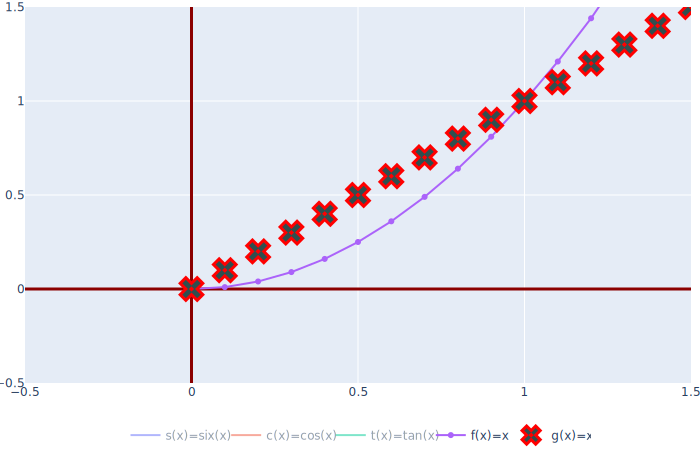

In [20]:
def s(x):
    return np.sin(x)

def c(x):
    return np.cos(x)

def t(x):
    return np.tan(x)

fig = go.Figure()    
fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=3,
                 zerolinecolor='DarkRed')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=3,
                 zerolinecolor='DarkRed')

fig.add_trace(go.Scatter(visible='legendonly', x=x, y=s(x), name='s(x)=six(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=c(x), name='c(x)=cos(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=t(x), name='t(x)=tan(x)'))

fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>', 
                         mode='lines+markers'))
fig.add_trace(go.Scatter(x=x, y=x, name='g(x)=x', mode='markers',
                         marker_symbol='x-dot',
                         marker=dict(color='DarkSlateGrey', size=20,
                                     line=dict(color='Red', width=3))))
fig.update_layout(legend_orientation='h', hovermode='x',
                  legend=dict(x=0.5, xanchor='center'),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo='all',
                  hovertemplate='Аргумент: %{x}<br>Функция: %{y}')
fig.show(show_format)